### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [34]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. display 5 columns from dataset

In [17]:
#1

df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
df.head(20)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
5,6,Male,False,3.18,Business,White,610.0,6.0,Consulting,NaN
6,7,Female,False,2.93,STEM,Other,590.0,3.0,Technology,Admit
7,8,Male,True,3.02,Business,NaN,630.0,6.0,Financial Services,NaN
8,9,Male,False,3.24,Business,White,590.0,2.0,Nonprofit/Gov,NaN
9,10,Male,False,3.27,Humanities,Asian,690.0,3.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2

df.info()
#conclusion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [47]:
#3a
df.admission.value_counts(dropna=False)


,count
admission,
2,5194
0,900
1,100


In [46]:
#3b
df.race.value_counts(dropna=False)


,count
race,
5,1842
4,1456
0,1147
1,916
2,596
3,237


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [7]:
#4
df['admission'] = df['admission'].fillna('Deny')
df['race'] = df['race'].fillna('Other')

5. recheck missing value

In [8]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [9]:
# 6
df = df.drop('application_id', axis=1)

7. show describe column and conclude what the insight is from that column

In [10]:
#7
df.describe()

#conclusion


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

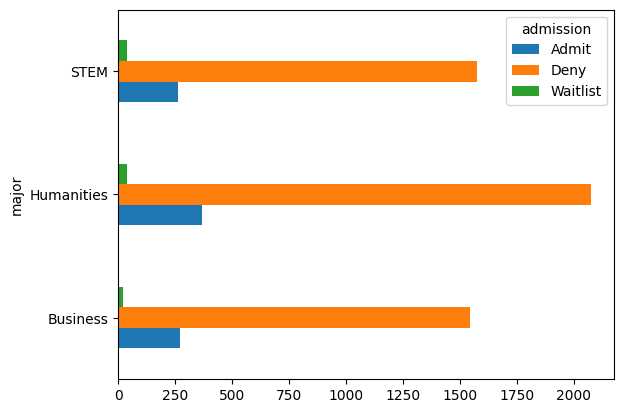

In [12]:
#8


pd.crosstab(df['major'],df['admission']).plot(kind='barh')
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

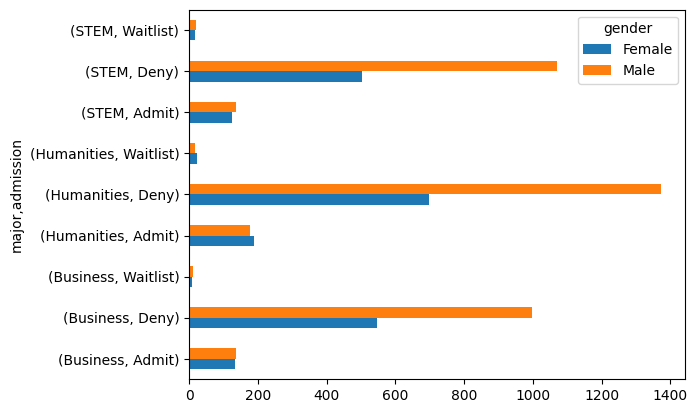

In [14]:
#9
pd.crosstab([df['major'], df['admission']], df['gender']).plot(kind='barh')
plt.show()


10. create your own insightful visualization and explain it in at least 2 sentences

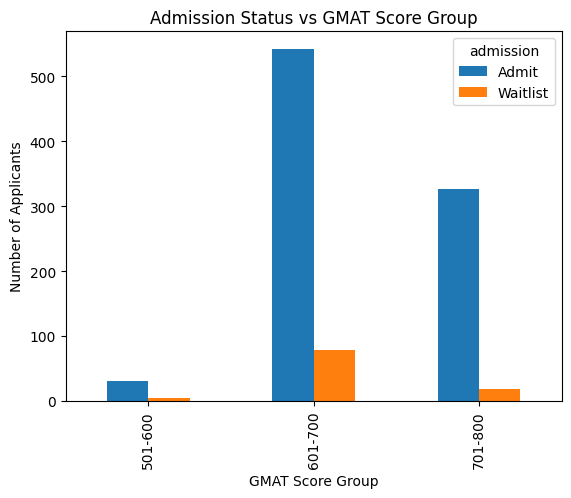

In [23]:
df['gmat_group'] = pd.cut(df['gmat'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800], labels=['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800'])

pd.crosstab(df['gmat_group'], df['admission']).plot(kind='bar')
plt.xlabel('GMAT Score Group')
plt.ylabel('Number of Applicants')
plt.title('Admission Status vs GMAT Score Group')
plt.show()

#10
Based on the visualization above, the human resource department is tend to receive applicant with GMAT in range of 601-700 points

11. create your own insightful visualization and explain it in at least 2 sentences

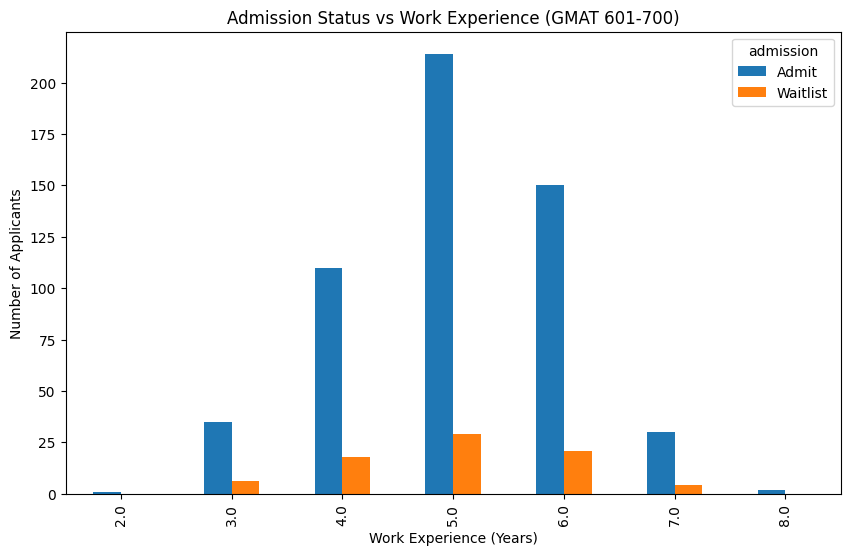

In [41]:
df['gmat_group'] = pd.cut(df['gmat'], bins=[0,100,200,300,400,500,600,700,800], labels=['0-100','101-200','201-300','301-400','401-500','501-600','601-700','701-800'])

gmat_range = df[df['gmat_group'] == '601-700']
gmat_range = gmat_range.dropna(subset=['work_exp'])
gmat_range = gmat_range[gmat_range['admission'].isin(['Admit', 'Waitlist'])]

pd.crosstab(gmat_range['work_exp'], gmat_range['admission']).plot(kind='bar', figsize=(10, 6))
plt.title('Admission Status vs Work Experience (GMAT 601-700)')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Number of Applicants')
plt.show()

12
From this visualization lets say all applicants have score of gmat range of 601-700, applicant that has work of experience of 5 is tend to be accepted.

12. encode categorical columns and display the results

In [ ]:
#12a
#encode X


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [ ]:
#12b
#encode y



,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

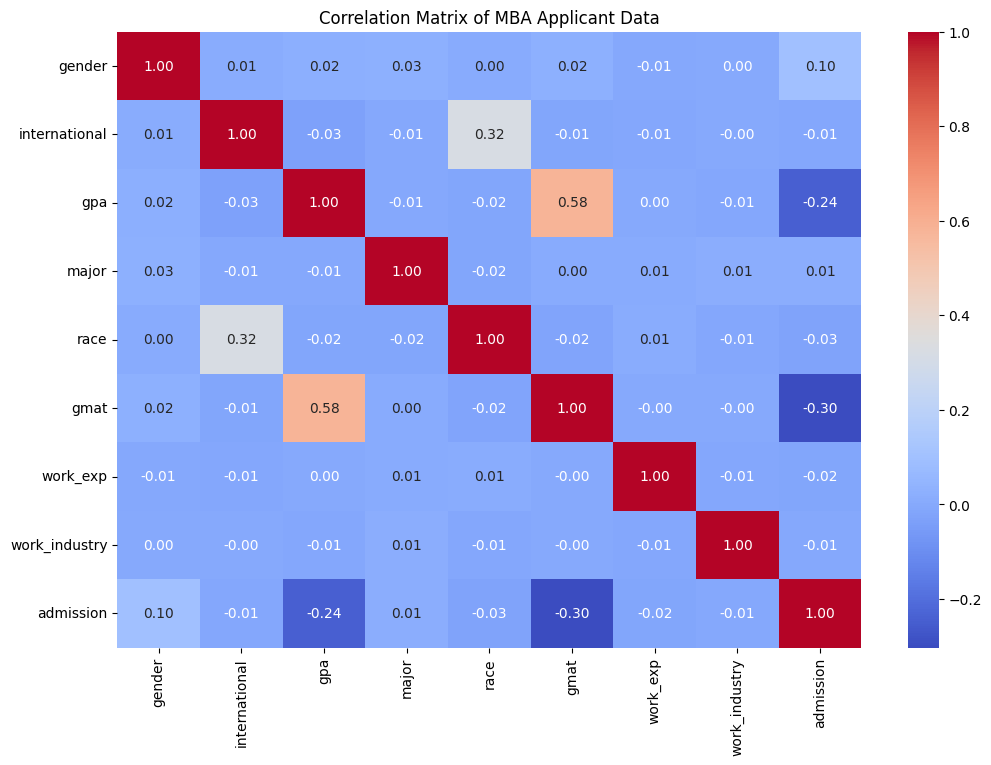

In [ ]:
#13


#Conclusion


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

class CustomEncoder(LabelEncoder):
    def transform(self, y):
        return np.searchsorted(self.classes_, y)

# Encode categorical columns
label_encoders = {}
for column in ['gender', 'international', 'major', 'race', 'work_industry', 'admission']:
    label_encoders[column] = CustomEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Prepare the data
X = df.drop(['admission', 'gmat_group', 'application_id'], axis=1)
y = df['admission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train the model with increased max_iter
model = LogisticRegression(max_iter=1000)  # Increase max_iter
model.fit(X_train, y_train)

# Calculate gpa_workexp_sum for Lisa
lisa_gpa_workexp_sum = df['gpa'].mean() + 2

# Create Lisa's data
lisa_data = pd.DataFrame({
    'gender': [0],
    'international': [0],
    'gpa': [df['gpa'].mean()],
    'major': [label_encoders['major'].transform(['Entrepreneurship'])[0]],
    'race': [label_encoders['race'].transform(['Asian'])[0]],
    'gmat': [580],
    'work_exp': [2],
    'work_industry': [label_encoders['work_industry'].transform(['Finance'])[0]],
    'gpa_workexp_sum': [lisa_gpa_workexp_sum]
})

# Make prediction for Lisa
lisa_prediction = model.predict(lisa_data)

# Decode the prediction
prediction_label = label_encoders['admission'].inverse_transform(lisa_prediction)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

prediction_label = label_encoders['admission'].inverse_transform(lisa_prediction)

# Make prediction for Lisa
lisa_prediction = model.predict(lisa_data)

# Simplified prediction interpretation
if lisa_prediction[0] == 1:
  prediction_label = "Deny"
elif lisa_prediction[0] == 0:
  prediction_label = "Admit"
else:
  prediction_label = "Waitlist"

print(f"Prediction for Lisa: {prediction_label}")


Accuracy: 0.8385794995964487
Prediction for Lisa: Waitlist


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
